# Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
from bs4 import BeautifulSoup
import copy
import math
import json
import pickle
import re

from utils import cleanhtml, calculateDistance, finger_heatmap, shift_col, shift_row, get_mapper, draw_keyboard, count_distance, count_presses, press_heatmap, zone_distances, distance_deltas, generate_strokes, count_stroke_distance, process_strokes

from consts import QWERTY, THUMBS, COORDS, default_position, default_keys

In [2]:
# Enable inline plots
%matplotlib inline
pd.set_option("display.width", 70)

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## Распределение пальцев по зонам
- ЛМ - левый мезинец
- ЛБ - левый безымянный
- ЛС - левый средний
- ЛУ - левый указательный
- ПУ - правый указательный
- ПС - правый средний
- ПБ - правый безымянный
- ПМ - правый мезинец

## Схема исходной клавиатуры

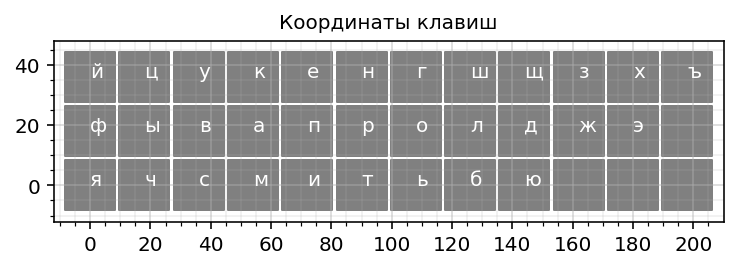

In [3]:
draw_keyboard(COORDS, QWERTY)

## Обработка и подготовка датасета

In [4]:
# dialogues = pd.read_csv("datasets/dialogues.tsv", sep='\t')[['dialogue']]
# dialogues['dialogue'] = dialogues['dialogue'].apply(cleanhtml)
# sample = dialogues['dialogue'].str.cat(sep='')
# strokes = generate_strokes(sample, THUMBS, QWERTY)
with open('sample.pkl', 'rb') as f:
    sample = pickle.load(f)
with open('strokes.pkl', 'rb') as f:
    strokes = pickle.load(f)

In [5]:
# processed_strokes = process_strokes(strokes, COORDS, QWERTY, THUMBS, default_position, default_keys)
with open('processed_strokes.pkl', 'rb') as f:
    processed_strokes = pickle.load(f)

## Тепловая карта пройденного расстояния

In [6]:
distances, pairs = processed_strokes["distances"], processed_strokes["pairs"]

In [30]:
pairs_df = pd.DataFrame([{"pair": k, "distance": v} for k, v in pairs.items()]).sort_values(by='distance', ascending=False)
mean = pairs_df["distance"].mean()
median = pairs_df["distance"].median()
row_count = pairs_df.shape[0]
print(f'Mean: {mean}, Median: {median}, Count: {row_count}')

Mean: 385892.23505144176, Median: 15136.311678041957, Count: 84


In [8]:
pairs_df[pairs_df["distance"] >= mean]

,pair,distance
10,то,4.369292e+06
26,ме,3.612650e+06
22,но,2.872794e+06
2,ка,2.309346e+06
7,ро,1.775358e+06
13,ик,1.665795e+06
25,нь,1.623251e+06
9,ть,1.406322e+06
24,го,1.297980e+06
35,ма,1.132272e+06


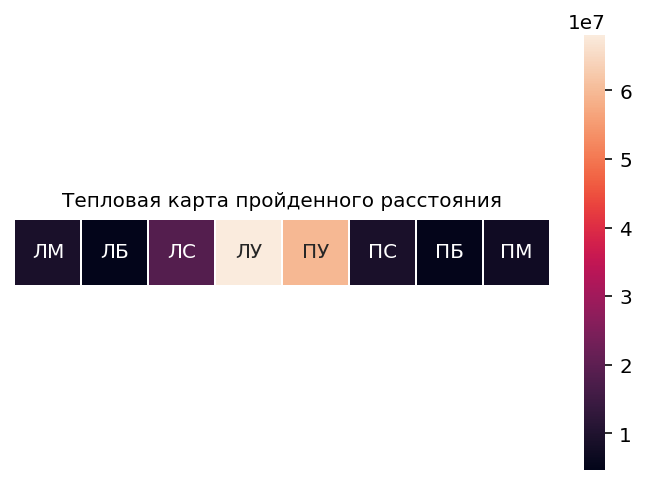

In [9]:
finger_distance_heatmap = finger_heatmap(distances)
heat_map = sb.heatmap(finger_distance_heatmap, linewidth=.5, square=True, annot=[['ЛМ','ЛБ','ЛС','ЛУ','ПУ','ПС','ПБ','ПМ']], fmt = '')
heat_map.set_title('Тепловая карта пройденного расстояния', fontsize=10)
heat_map.axis('off')
plt.show()

## Тепловая карта частоты нажатий

In [10]:
press_count = count_presses(sample)
keypresses_heatmap = press_heatmap(press_count, QWERTY)

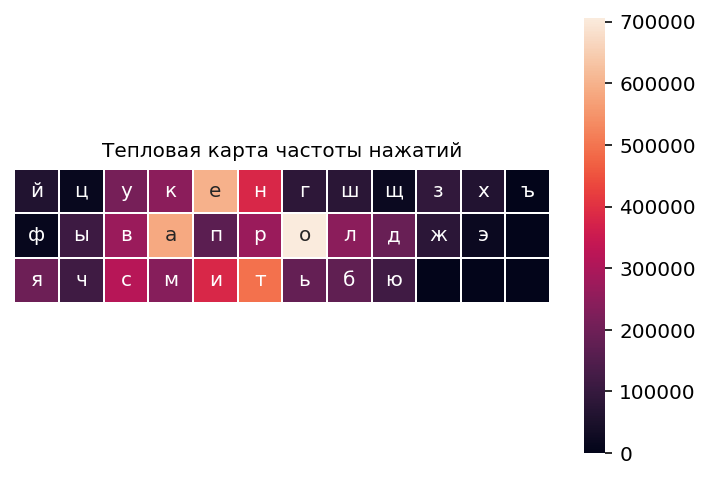

In [11]:
heat_map = sb.heatmap(keypresses_heatmap, linewidth=.5, square=True, annot=QWERTY, fmt = '')
heat_map.set_title('Тепловая карта частоты нажатий', fontsize=10)
heat_map.axis('off')
plt.show()

## Частота нажаний и расстояние от исходного положения пальцев по каждой зоне

### Левый мизинец

In [12]:
pd.DataFrame(zone_distances('ЛМ', press_count))

,symbol,distance,press_count
0,я,18.0,196845
1,й,18.0,62567
2,ф,0.0,12733


### Левый безымянный


In [13]:
pd.DataFrame(zone_distances('ЛБ', press_count))


,symbol,distance,press_count
0,ч,18.0,116101
1,ы,0.0,115168
2,ц,18.0,15752


### Левый средний


In [14]:
pd.DataFrame(zone_distances('ЛС', press_count))

,symbol,distance,press_count
0,с,18.0,317754
1,в,0.0,270954
2,у,18.0,214586


### Левый указательный

In [15]:
pd.DataFrame(zone_distances('ЛУ', press_count))

,symbol,distance,press_count
0,е,25.455844,598043
1,а,0.000000,585871
2,и,25.455844,381875
3,к,18.000000,245283
4,м,18.000000,238761
5,п,18.000000,166735


### Правый указательный


In [16]:
pd.DataFrame(zone_distances('ПУ', press_count))

,symbol,distance,press_count
0,о,0.000000,705513
1,т,25.455844,493391
2,н,25.455844,382442
3,р,18.000000,271317
4,ь,18.000000,182746
5,г,18.000000,84998


### Правый средний

In [17]:
pd.DataFrame(zone_distances('ПС', press_count))

,symbol,distance,press_count
0,л,0.0,247635
1,б,18.0,174534
2,ш,18.0,79281


### Правый безымянный

In [18]:
pd.DataFrame(zone_distances('ПБ', press_count))

,symbol,distance,press_count
0,д,0.0,190006
1,ю,18.0,120850
2,щ,18.0,19415


### Правый мизинец

In [19]:
pd.DataFrame(zone_distances('ПМ', press_count))

,symbol,distance,press_count
0,з,18.000000,93063
1,ж,0.000000,81497
2,х,25.455844,65333
3,э,18.000000,21474
4,ъ,40.249224,897


## Переставим кнопки в каждой зоне так, чтобы наиболее частые клавиши находились как можно ближе к исходному положению

In [20]:
QWERTY_1 = [
    ['й','ц','у','к','м','г','н','ш','щ','ж','ъ',''],
    ['я','ч','с','е','а','т','о','л','д','з','э',''],
    ['ф','ы','в','и','п','ь','р','б','ю','х','',''],
]

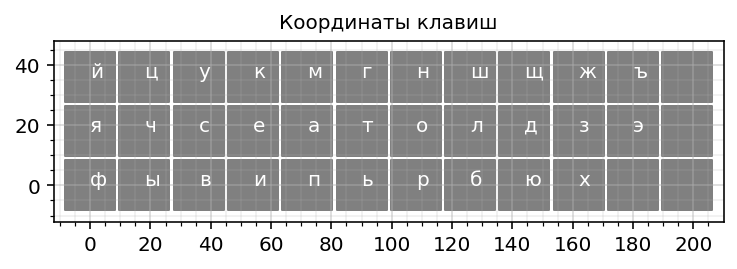

In [21]:
draw_keyboard(COORDS, QWERTY_1)

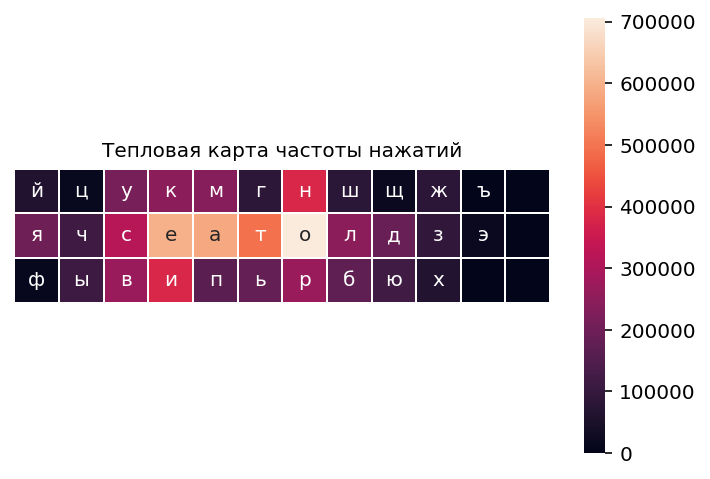

In [22]:
keypresses_heatmap = press_heatmap(press_count, QWERTY_1)
heat_map = sb.heatmap(keypresses_heatmap, linewidth=.5, square=True, annot=QWERTY_1, fmt = '')
heat_map.set_title('Тепловая карта частоты нажатий', fontsize=10)
heat_map.axis('off')
plt.show()

In [23]:
# processed_strokes_1 = process_strokes(strokes, COORDS, QWERTY_1, THUMBS, default_position, default_keys)
with open('processed_strokes_1.pkl', 'rb') as f:
    processed_strokes_1 = pickle.load(f)

In [24]:
distances_1, pairs_1 = processed_strokes_1["distances"], processed_strokes_1["pairs"]

In [25]:
distance_deltas(distances, distances_1)

ЛМ: 2706.59 м - меньше на 6454.19 м (70.45%)
ЛБ: 4693.82 м - меньше на 34.09 м (0.72%)
ЛС: 17343.61 м - меньше на 1274.33 м (6.84%)
ЛУ: 58768.44 м - меньше на 9349.80 м (13.73%)
ПУ: 51484.34 м - меньше на 8147.21 м (13.66%)
ПС: 9012.85 м - меньше на 0.00 м (0.00%)
ПБ: 5041.15 м - меньше на 0.00 м (0.00%)
ПМ: 6072.11 м - меньше на 1360.49 м (18.30%)

Общая дистанция уменшилась на 26620.11 м


In [31]:
pairs_df_1 = pd.DataFrame([{"pair": k, "distance": v} for k, v in pairs_1.items()]).sort_values(by='distance', ascending=False)
mean = pairs_df_1["distance"].mean()
median = pairs_df_1["distance"].median()
row_count = pairs_df_1.shape[0]
print(f'Mean: {mean}, Median: {median}, Count: {row_count}')

Mean: 373913.6487059829, Median: 17730.0, Count: 84


In [32]:
pairs_df_1[pairs_df["distance"] >= mean]

c:\Users\maxav\Desktop\ErgoKB\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,pair,distance
2,ка,3.265908e+06
10,то,3.089556e+06
26,ме,2.284840e+06
22,но,2.031372e+06
29,им,1.973902e+06
24,го,1.835621e+06
7,ро,1.775358e+06
25,нь,1.623251e+06
13,ик,1.489932e+06
9,ть,1.406322e+06
